## uniformity_and_alignment_for_temperature

In [97]:
font = {'family': 'Times New Roman', 'size': 22}
small_font = {'family': 'Times New Roman', 'size': 16}
title_font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}

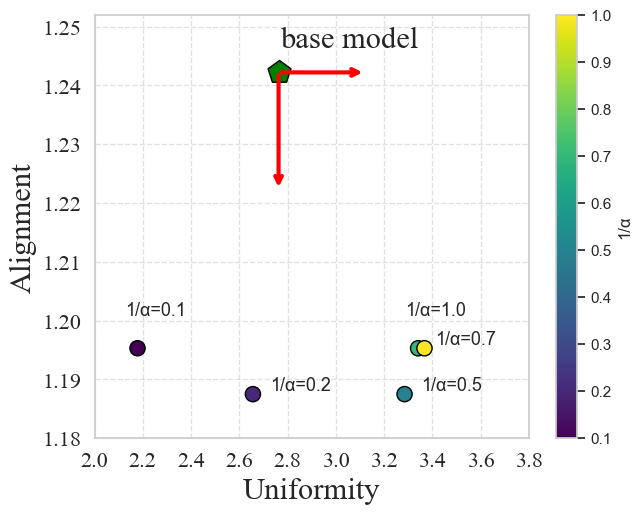

In [99]:
import numpy as np
import matplotlib.pyplot as plt

temperatures = [0.1, 0.2, 0.5, 0.7, 1.0]  # Temperature range
alignment = [1.1953, 1.1875, 1.1875, 1.1953, 1.1953]  # Hypothetical alignment behavior (decreases with temperature)
uniformity = [2.1774, 2.6560, 3.2849, 3.3411, 3.3675]  # Hypothetical uniformity behavior (log scale increases with temperature)

# Create scatter plot
plt.figure(figsize=(7, 5.5))
# Scatter plot for alignment and uniformity with temperatures marked
scatter = plt.scatter(uniformity, alignment, c=temperatures, cmap='viridis', s=120, edgecolor='black')

# Function to avoid overlapping annotations by adjusting text placement
def adjust_annotation(i, alignment, uniformity, offset=0.05):
    # Check for overlap with previous text
    for j in range(i):
        if abs(alignment[i] - alignment[j]) < offset and abs(uniformity[i] - uniformity[j]) < offset:
            return alignment[i] + 0.005, uniformity[i]-0.15  # Adjust text position if overlap is detected
    return alignment[i], uniformity[i]  # No overlap, return original position

# Annotate each point with the temperature value
for i, t in enumerate(temperatures):
    if i == 0:
        adjusted_alignment, adjusted_uniformity = adjust_annotation(i, alignment, uniformity)
        plt.text(adjusted_uniformity-0.05 , adjusted_alignment+0.005, f'1/α={t:.1f}', fontsize=13, ha='left', va='bottom')
        
#         plt.text(uniformity + 0.05, alignment, f'1/α={t:.1f}', fontsize=12, ha='left', va='bottom')
    else:
        adjusted_alignment, adjusted_uniformity = adjust_annotation(i, alignment, uniformity)
        plt.text(adjusted_uniformity + 0.07, adjusted_alignment, f'1/α={t:.1f}', fontsize=13, ha='left', va='bottom')

# Add arrows
plt.annotate('', xy=(special_point['Uniformity'], special_point['Alignment_norm'] - 0.02), 
             xytext=(special_point['Uniformity'], special_point['Alignment_norm']), 
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=3))

plt.annotate('', xy=(special_point['Uniformity'] + 0.36, special_point['Alignment_norm']), 
             xytext=(special_point['Uniformity'], special_point['Alignment_norm']), 
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=3))


special_point = {'Alignment_norm': 1.2422, 'Uniformity': 2.7624}
plt.scatter(special_point['Uniformity'], special_point['Alignment_norm'], 
            color='green', marker='p', s=300, label="base model", edgecolors='black')
plt.text(2.77,1.2465,f'base model', fontdict=font)

plt.ylim(1.18, 1.252)
plt.xlim(2, 3.8)
# Add labels and title
plt.xlabel('Uniformity',fontdict=font)
plt.ylabel('Alignment',fontdict=font)
# plt.title('Alignment vs Uniformity with Temperature α',fontdict=title_font, pad=12)
plt.xticks(fontsize=16, family='Times New Roman')
plt.yticks(fontsize=16, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.6)
# Display color bar to show temperature scale
plt.colorbar(scatter, label='1/α')
plt.savefig('uniformity_and_alignment_for_temperature.pdf', format='pdf', dpi=600)
# Display the plot
# plt.tight_layout()
plt.show()


## retrieval for temperature

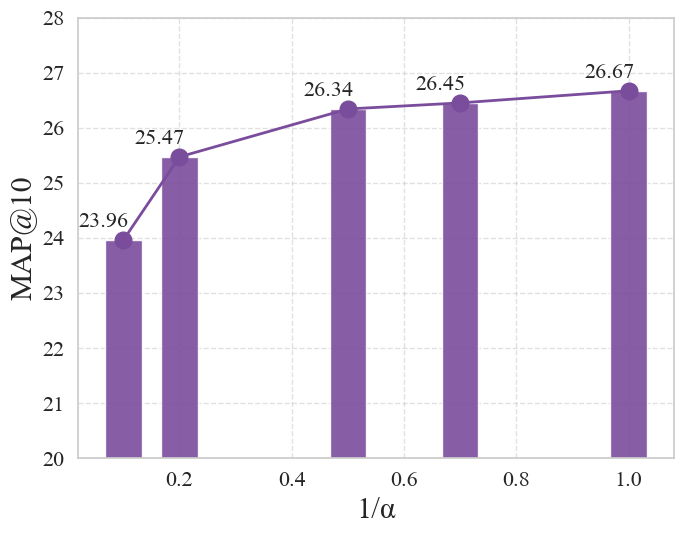

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 只用五个数据点
x = np.array([0.1, 0.2, 0.5, 0.7, 1.0])  # 5个X点
y = np.array([23.96, 25.47, 26.34, 26.45, 26.67])  # 对应的y值

# 创建绘图对象
fig, ax = plt.subplots(figsize=(7, 5.5))

# 绘制折线图
# bar_colors = ['#4e1f73', '#f7f419']
# bar_colors = ['#1f77b4', '#ff7f0e'] 
bar_colors = ['#7a4c9c', '#e1d34b']
plt.bar(x, y, width=0.065, color=bar_colors[0], alpha=0.9, label='MAP@10')
plt.plot(x, y,  color=bar_colors[0], linewidth=2, marker='o', markersize=12,label='Trend')

# 在每个点上添加横坐标的标签
for i in range(len(x)):
#     if i == 0:
#         plt.text(x[i]+0.05, y[i]+0.1, f'{x[i]:.1f}', fontsize=14, ha='right', va='bottom', fontdict=font)
#     else: 
    plt.text(x[i]+0.01, y[i]+0.15, f'{y[i]:.2f}', ha='right', va='bottom', fontdict={'family': 'Times New Roman', 'size': 16})
#     plt.text(x[i], y[i], f'{x[i]:.1f}', fontsize=14, ha='right', va='bottom', fontdict=font)
plt.ylim(20, 28)
# plt.ylim(-1.2, 1.2)

# 添加标题和标签
# plt.title('Retrieval Performance for Different Temperature α', fontdict=title_font, pad=12)
plt.xlabel('1/α', fontdict=font)
plt.ylabel('MAP@10', fontdict=font)
plt.xticks(fontsize=16, family='Times New Roman')
plt.yticks(fontsize=16, family='Times New Roman')

# 添加网格
plt.grid(True, linestyle='--', alpha=0.6)

# 添加图例
# plt.legend(loc='upper left', fontsize=12)
plt.savefig('retrievalfortemperature.pdf', format='pdf', bbox_inches="tight", dpi=600)

# 显示图形
plt.tight_layout()  # 自动调整布局，


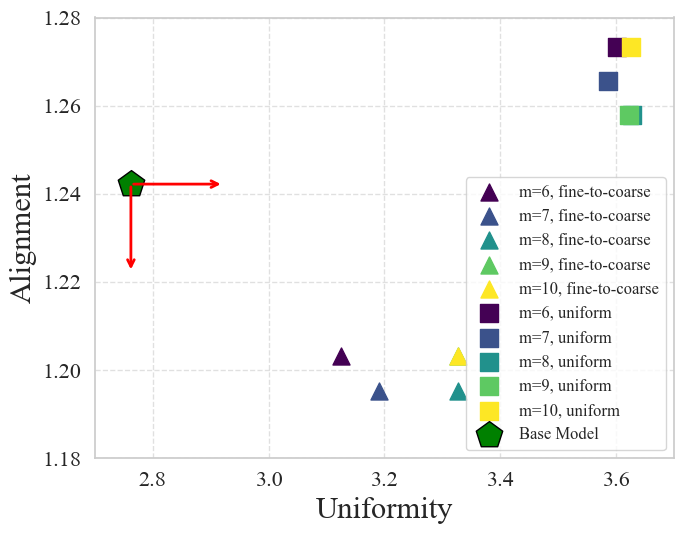

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

# Data
data = [
    (6, "fine-to-coarse", 1.2031, 3.1258),
    (7, "fine-to-coarse", 1.1953, 3.1907),
    (8, "fine-to-coarse", 1.1953, 3.3276),
    (9, "fine-to-coarse", 1.2031, 3.3266),
    (10, "fine-to-coarse", 1.2031, 3.3267),
    (6, "uniform", 1.2734, 3.6012),
    (7, "uniform", 1.2656, 3.5860),
    (8, "uniform", 1.2578, 3.6276),
    (9, "uniform", 1.2578, 3.6222),
    (10, "uniform", 1.2734, 3.6265),
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["m", "Shape", "Alignment_norm", "Uniformity"])

# Set seaborn style
sns.set(style="whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(7, 5.5))

# Define colormap
cmap = plt.get_cmap("viridis")  # You can change this to other colormaps like "plasma", "inferno", etc.
norm = plt.Normalize(vmin=df["m"].min(), vmax=df["m"].max())  # Normalize m values to the colormap

# Plot scatter with color based on 'm' value using colormap
for shape in df["Shape"].unique():
    subset = df[df["Shape"] == shape]  # Select data for each shape
    marker = '^' if shape == "fine-to-coarse" else 's'  # Set marker shape for different strategies
    for m_val in subset["m"].unique():
        sub_subset = subset[subset["m"] == m_val]
        
        # Color based on m value using the colormap
        color = cmap(norm(m_val))
        
        plt.scatter(
            sub_subset["Uniformity"], sub_subset["Alignment_norm"],
            label=f"m={m_val}, {shape}", 
            color=color, alpha=1, s=150, marker=marker
        )

# Add special point
special_point = {'Alignment_norm': 1.2422, 'Uniformity': 2.7624}
plt.scatter(special_point['Uniformity'], special_point['Alignment_norm'], 
            color='green', marker='p', s=400, label="Base Model", edgecolors='black')

# Add arrows
plt.annotate('', xy=(special_point['Uniformity'], special_point['Alignment_norm'] - 0.02), 
             xytext=(special_point['Uniformity'], special_point['Alignment_norm']), 
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

plt.annotate('', xy=(special_point['Uniformity'] + 0.16, special_point['Alignment_norm']), 
             xytext=(special_point['Uniformity'], special_point['Alignment_norm']), 
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

# Font properties for Times New Roman
font_prop = fm.FontProperties(family='Times New Roman')

# Set axis limits
plt.ylim(1.18, 1.28)
plt.xlim(2.7, 3.7)

# Set font and title
plt.xlabel('Uniformity',fontdict={'family': 'Times New Roman', 'size': 22})
plt.ylabel('Alignment',fontdict={'family': 'Times New Roman', 'size': 22})
# plt.title("Alignment vs. Uniformity for Different m and Sampling Strategies", fontdict=title_font, pad=12)
plt.legend(fontsize=14, loc='lower right', prop=font_prop)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust tick font
plt.xticks(fontsize=16, family='Times New Roman')
plt.yticks(fontsize=16, family='Times New Roman')

# Save the plot
plt.tight_layout()
plt.savefig('uniformity_and_alignment_for_m_and_sampling.pdf', format='pdf', bbox_inches="tight", dpi=600)

# Show plot
plt.show()


## retrieval_for_m_and_sampling

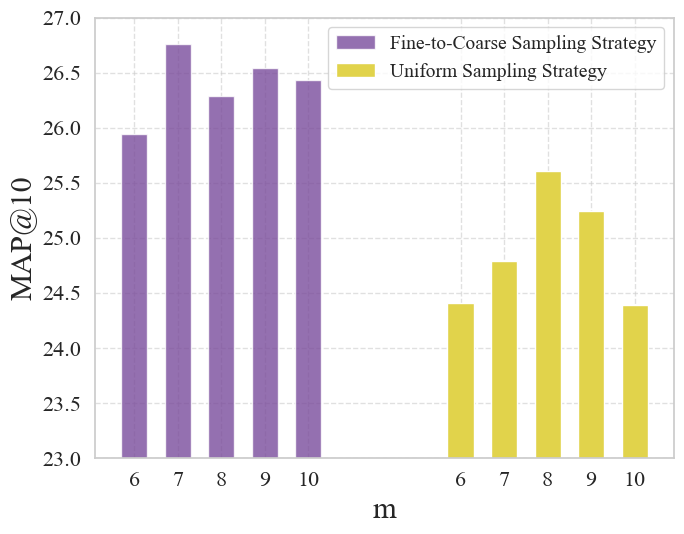

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = [
    (6, "fine-to-coarse", 25.94),
    (7, "fine-to-coarse", 26.76),
    (8, "fine-to-coarse", 26.29),
    (9, "fine-to-coarse", 26.54),
    (10, "fine-to-coarse", 26.43),
    (6, "uniform", 24.41),
    (7, "uniform", 24.79),
    (8, "uniform", 25.61),
    (9, "uniform", 25.24),
    (10, "uniform", 24.39),
]

import matplotlib.pyplot as plt
import numpy as np

# 新数据
data = [
    (6, "fine-to-coarse", 25.94),
    (7, "fine-to-coarse", 26.76),
    (8, "fine-to-coarse", 26.29),
    (9, "fine-to-coarse", 26.54),
    (10, "fine-to-coarse", 26.43),
    (6, "uniform", 24.41),
    (7, "uniform", 24.79),
    (8, "uniform", 25.61),
    (9, "uniform", 25.24),
    (10, "uniform", 24.39),
]

# 提取m值、shape和metrics
m_values = [6, 7, 8, 9, 10]
fine_to_coarse_metrics = [25.94, 26.76, 26.29, 26.54, 26.43]
uniform_metrics = [24.41, 24.79, 25.61, 25.24, 24.39]

# 设置柱状图的位置
x_fine_to_coarse = np.arange(len(m_values))  # fine-to-coarse的位置
x_uniform = np.arange(len(m_values)) + len(m_values) + 2.5  # uniform的位置，确保它们在右侧

# 柱子的宽度
width = 0.6
# 创建图表
fig, ax = plt.subplots(figsize=(7, 5.5))

# 绘制fine-to-coarse的柱状图（左边区域）
# bar_colors = ['#1f77b4', '#ff7f0e'] 
# bar_colors = ['#fde725', '#440154'] 
bar_colors = ['#7a4c9c', '#e1d34b']
ax.bar(x_fine_to_coarse, fine_to_coarse_metrics, width, label="Fine-to-Coarse Sampling Strategy", color=bar_colors[0], alpha=0.8)

# 绘制uniform的柱状图（右边区域）
ax.bar(x_uniform, uniform_metrics, width, label="Uniform Sampling Strategy", color=bar_colors[1], alpha=1)
# ax.legend(fontsize=16, family='Times New Roman')

legend = ax.legend(fontsize=14, loc='best')  # 设置字体大小和样式
for label in legend.get_texts(): 
    label.set_fontname('Times New Roman')

# 设置标签、标题等
plt.ylim(23, 27)
ax.set_xlabel("m",fontdict=font)
ax.set_ylabel("MAP@10",fontdict=font)
# ax.set_title("Retrieval Performance for Different m and Sampling Strategies",fontdict=title_font, pad=12)
ax.set_xticks(np.concatenate([x_fine_to_coarse, x_uniform]))
ax.set_xticklabels(m_values * 2)  # X轴标签显示m值
# ax.legend()
plt.xticks(fontsize=16, family='Times New Roman')
plt.yticks(fontsize=16, family='Times New Roman')

plt.grid(True, linestyle='--', alpha=0.6)
# 调整图表布局
plt.tight_layout()
plt.savefig('retrieval_for_m_and_sampling.pdf', format='pdf', bbox_inches="tight", dpi=600)
plt.show()